## Exercise Description:

Perform classification for the entire MNIST dataset based on the algorithms introduced: Use LDA for dimensionality reduction to 2 or 9 dimensions, classify the dimension-reduced data and compare this classification performance with that of using PCA

In [7]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Data path
data_path = "../Data/"

In [8]:
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = data_path+"mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

print(f"train_set: \n{train_set}, shape: {train_set.shape}")
print(f"train_targets: \n{train_targets}, shape: {train_targets.shape}")
print(f"test_set: \n{test_set}, shape: {test_set.shape}")
print(f"test_targets: \n{test_targets}, shape: {test_targets.shape}")

train_set: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape: (60000, 784)
train_targets: 
[0 0 0 ... 9 9 9], shape: (60000,)
test_set: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape: (10000, 784)
test_targets: 
[0 0 0 ... 9 9 9], shape: (10000,)


In [9]:
# Scale the data
train_set = StandardScaler().fit_transform(train_set)
test_set = StandardScaler().fit_transform(test_set)

## Using PCA/LDA reduce the data dimensionality to either 2, 9 or both

In [10]:
n_components = 9

# PCA
# To reduce the dimension from 784 to 2/9/both we choose the corresponding number of principal components.
pca = PCA(n_components=n_components)
pca.fit(train_set)

# Transform train data from each class using fitted PCA instance
pca_transform = pca.transform(train_set)

print(pca)
print(pca_transform)
print(f"shape: {pca_transform.shape}")

# LDA
lda = LDA(n_components=n_components)
lda.fit(train_set, train_targets) # "We train the data" we fit the model to the data and not the reverse

# Transform train data from each class using fitted LDA instance
lda_transform = lda.transform(train_set) # We transform the data (reduce the dimensionality)

print(lda)
print(lda_transform)
print(f"shape: {lda_transform.shape}")



PCA(n_components=9)
[[ 8.70897783 -7.75439462 -3.4479136  ... -0.27287572  3.12276405
   0.22277528]
 [10.41077935 -8.30838403 -3.89713975 ...  1.87125576  2.52556221
  -0.66058066]
 [ 1.79272676 -6.38353957 -1.53042497 ... -0.41651063  5.54285412
  -3.94875972]
 ...
 [-4.65708225 -0.56255767 -7.9396742  ... -4.75716797  4.35937971
   0.87409836]
 [-4.18922311 -2.45950596 -3.97637161 ... -1.85286442  0.43762232
   0.26565611]
 [-5.19522753 -2.53550598 -2.59641226 ... -1.34740821  0.19859003
   1.51314991]]
shape: (60000, 9)
LinearDiscriminantAnalysis(n_components=9)
[[-2.89955639 -3.3132971  -2.86590966 ...  0.41748093 -0.91252842
   0.19437836]
 [-1.93297435 -2.4138661  -4.09444995 ...  1.3877925   0.34380067
   0.27105263]
 [-2.86066018 -0.87310869 -0.76646836 ... -1.28345577 -1.31530178
  -1.22634796]
 ...
 [ 3.28934611 -2.03394402 -0.15547431 ... -0.24526858 -0.30966187
   1.91281702]
 [ 2.88912688 -0.88939073  0.28121659 ...  0.03023044 -0.97058681
   1.54963814]
 [ 2.68807123 -0.

In [11]:
def separate_data(data,n):
    data_sep = []
    for i in range(n+1):
        data_sep.append(data[train_targets == i])
        
    return data_sep

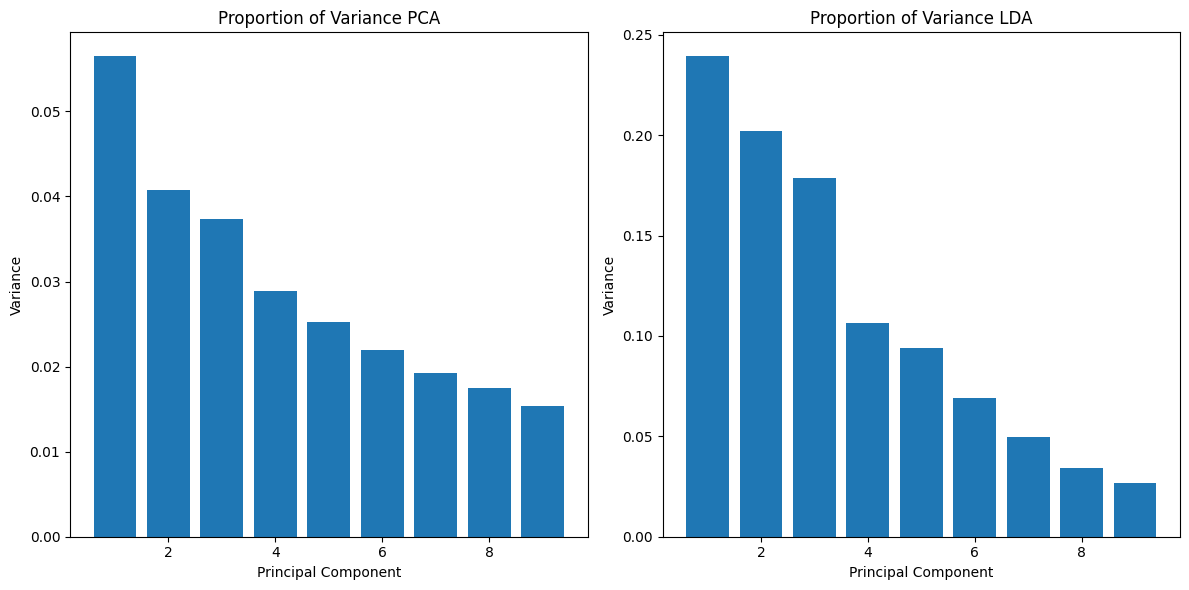

In [12]:
# Analyze proportion of Variance. If num_components=2 try to visualize dim. reduced data.
pca_variance = pca.explained_variance_ratio_
lda_variance = lda.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(range(1, len(pca_variance) + 1), pca_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Proportion of Variance PCA')

plt.subplot(122)
plt.bar(range(1, len(lda_variance) + 1), lda_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Proportion of Variance LDA')
plt.tight_layout()
plt.show()


# Separating data
data1 = separate_data(pca_transform,pca_transform.shape[1])
data2 = separate_data(lda_transform,lda_transform.shape[1])


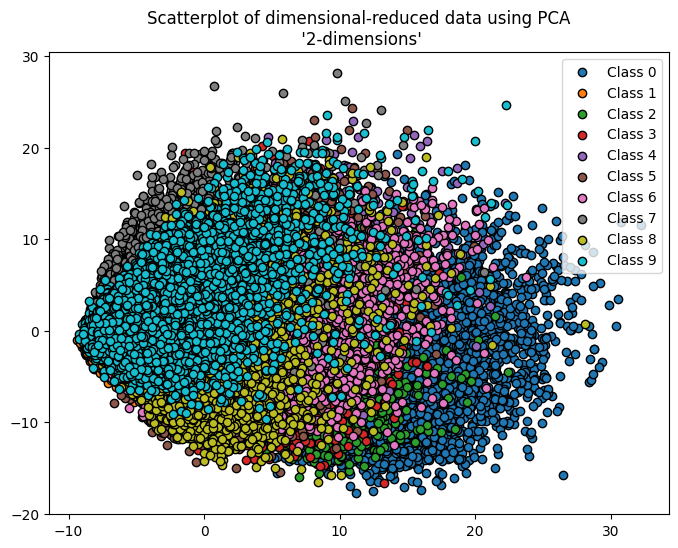

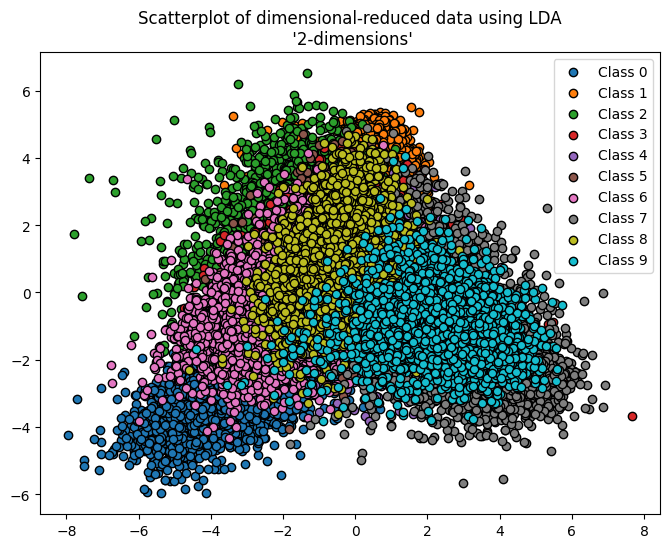

In [13]:
# Visualize 2 dimensions for all classes
# PCA
n,m = 8,6
plt.figure(figsize=(n, m))
for i in range(len(data1)):
    plt.scatter(data1[i][:,0],data1[i][:,1],edgecolors="k", label=f"Class {i}")
plt.legend(loc='upper right')
plt.title("Scatterplot of dimensional-reduced data using PCA\n \'2-dimensions\'")
plt.show()

# LDA
plt.figure(figsize=(n, m))
for i in range(len(data2)):
    plt.scatter(data2[i][:,0],data2[i][:,1],edgecolors="k", label=f"Class {i}")
plt.legend(loc='upper right')
plt.title("Scatterplot of dimensional-reduced data using LDA\n \'2-dimensions\'")
plt.show()

## Probabilistic Generative Model - Bayesian

Estimate Gaussians for PCA/LDA

In [14]:
# Estimate Gaussians from PCA/LDA
n = 10

# Compute means PCA/LDA
pca_means = []
lda_means = []
for i in range(n):
    pca_means.append(np.mean(data1[i], axis=0))
    lda_means.append(np.mean(data2[i], axis=0))
    #print(f"PCA {i} mean: {pca_means[i]}")
    #print(f"LDA {i} mean: {lda_means[i]}")
    
# Compute covs PCA/LDA
pca_covs = []
lda_covs = []
for i in range(n):
    pca_covs.append(np.cov(data1[i], rowvar=False))
    lda_covs.append(np.cov(data2[i], rowvar=False))
    #print(f"PCA {i} cov: {pca_covs[i]}")
    #print(f"LDA {i} cov: {LDA_covs[i]}")


# Priors PCA/LDA
Total_samples = len(train_targets)
priors_pca = []
priors_lda = []
for i in range(n):
    priors_pca.append(len(data1[i]) / Total_samples)
    priors_lda.append(len(data2[i]) / Total_samples)

Transforming Test Data and Computing posterior probabilities

In [15]:
# Transform test data:
pca_test_transform = pca.transform(test_set)
lda_test_transform = lda.transform(test_set)

# Compute likelihood PCA/LDA
likelihoods_pca = []
likelihoods_lda = []
for i in range(n):
    likelihoods_pca.append(multivariate_normal.pdf(pca_test_transform, pca_means[i],pca_covs[i]))
    likelihoods_lda.append(multivariate_normal.pdf(lda_test_transform, lda_means[i],lda_covs[i]))
    
# Compute evidence
pca_evidences = []
lda_evidences = []

for i in range(n):
    pca_evidences.append(priors_pca[i] * likelihoods_pca[i])
    lda_evidences.append(priors_lda[i] * likelihoods_lda[i])

pca_evidence = np.sum(pca_evidences)
lda_evidence = np.sum(lda_evidences)

# Compute posteriors
posts_pca = []
posts_lda = []

for i in range(n):
    posts_pca.append((pca_evidences[i] / pca_evidence))
    posts_lda.append((lda_evidences[i] / lda_evidence))

In [16]:
def classification1(posts):
    classifications = []
    
    for i in range(10000):
        max_index = 0
        max_value = 0
        
        for j in range(len(posts)):
            if posts[j][i] > max_value:
                max_value = posts[j][i]
                max_index = j
        
        classifications.append(max_index)
    return classifications

# Test
test1 = classification1(posts_pca)

import collections
# Use Counter to count occurrences for array1
value_counts_array1 = collections.Counter(test1)

# Print the counts for array1
for value, count in sorted(value_counts_array1.items()):
    print(f'Value {value} in array1: {count} occurrences')


def prediction(classifications):
    correct_predictions = []
    for i in range(len(test_targets)):
        if classifications[i] == test_targets[i]:
            correct_predictions.append(1)
    
    return correct_predictions    
        

Value 0 in array1: 1019 occurrences
Value 1 in array1: 1171 occurrences
Value 2 in array1: 971 occurrences
Value 3 in array1: 1014 occurrences
Value 4 in array1: 930 occurrences
Value 5 in array1: 883 occurrences
Value 6 in array1: 947 occurrences
Value 7 in array1: 964 occurrences
Value 8 in array1: 965 occurrences
Value 9 in array1: 1136 occurrences

Value 0 in array2: 1171 occurrences
Value 1 in array2: 971 occurrences
Value 2 in array2: 1014 occurrences
Value 3 in array2: 930 occurrences
Value 4 in array2: 883 occurrences
Value 5 in array2: 947 occurrences
Value 6 in array2: 964 occurrences
Value 7 in array2: 965 occurrences
Value 8 in array2: 1136 occurrences
Value 9 in array2: 1019 occurrences


Classify Data and Calculate Accuracy

In [17]:
Classification_pca1 = classification1(posts_pca)
Classification_lda1 = classification1(posts_lda)

print(Classification_pca1)
print(Classification_lda1)

# Calculate accuracy using labels
correct_predictions_pca1 = prediction(Classification_pca1)
correct_predictions_lda1 = prediction(Classification_lda1)

print("Function 1")        
print(f"Correct predictions pca: {sum(correct_predictions_pca1)}")
print(f"Correct predictions lda: {sum(correct_predictions_lda1)}")

accuracy_pca = sum(correct_predictions_pca1) / len(test_targets) * 100
accuracy_lda = sum(correct_predictions_lda1) / len(test_targets) * 100
#print(f"Accuracy pca: {accuracy_pca:.2f}%")
#print(f"Accuracy lda: {accuracy_lda:.2f}%")


[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 6, 0, 0, 0, 5, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 6, 0, 0, 5, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 5, 0, 0, 0, 9, 0, 0, 0, 0, 0, 2, 

## Probabilistic Discriminative Model - Logistic Regression

In [18]:
n_components = 9

# PCA
pca = PCA(n_components=n_components)
pca.fit(train_set)
pca_train = pca.transform(train_set)
pca_test_train = pca.transform(test_set)

# LDA
lda = LDA(n_components=n_components)
lda.fit(train_set, train_targets) 
lda_train = lda.transform(train_set) 
lda_test_train = lda.transform(test_set)


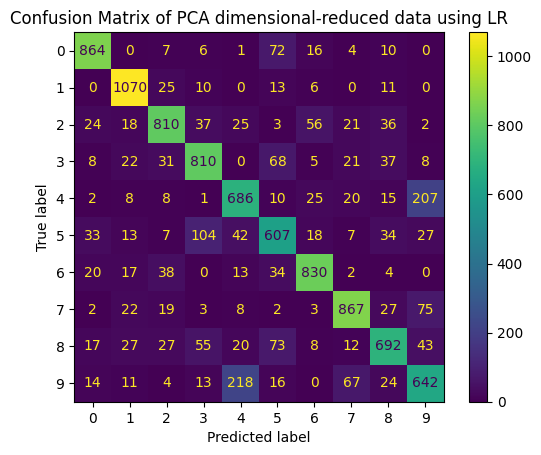

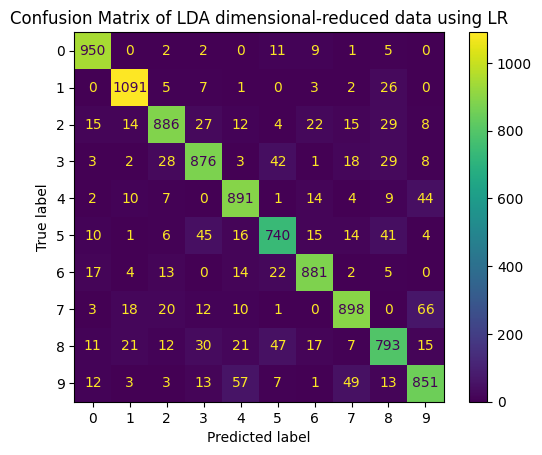

In [21]:
# Creating and training logistic regression model
model_LR1 = LogisticRegression(max_iter=300)
model_LR2 = LogisticRegression(max_iter=300)

pca_LR = model_LR1.fit(pca_train, train_targets)
lda_LR = model_LR2.fit(lda_train, train_targets)

# Predict probabilities
pca_predict_LR = pca_LR.predict(pca_test_train)
lda_predict_LR = lda_LR.predict(lda_test_train)

# Compute accuracy by confusion matrix
pca_matrix = confusion_matrix(test_targets,pca_predict_LR)
lda_matrix = confusion_matrix(test_targets,lda_predict_LR)

# Plot confusion matrix
pca_matrix = ConfusionMatrixDisplay(confusion_matrix=pca_matrix, display_labels=pca_LR.classes_)
lda_matrix = ConfusionMatrixDisplay(confusion_matrix=lda_matrix, display_labels=lda_LR.classes_)

pca_matrix.plot()
plt.title("Confusion Matrix of PCA dimensional-reduced data using LR")
lda_matrix.plot()
plt.title("Confusion Matrix of LDA dimensional-reduced data using LR")
plt.show()

## Discriminant Functions - Perceptron

c:\Users\simon\Nextcloud\7th Semester Project\ComTek-7-AVS\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


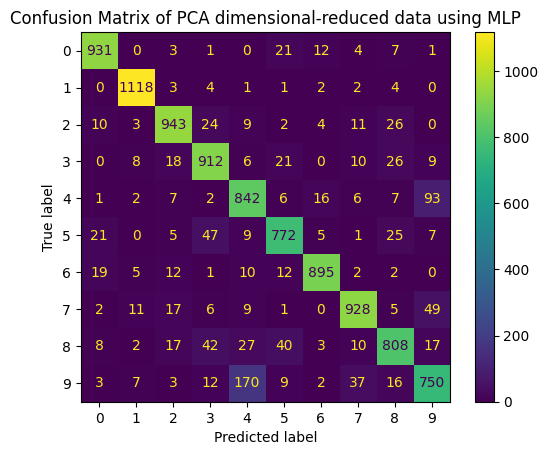

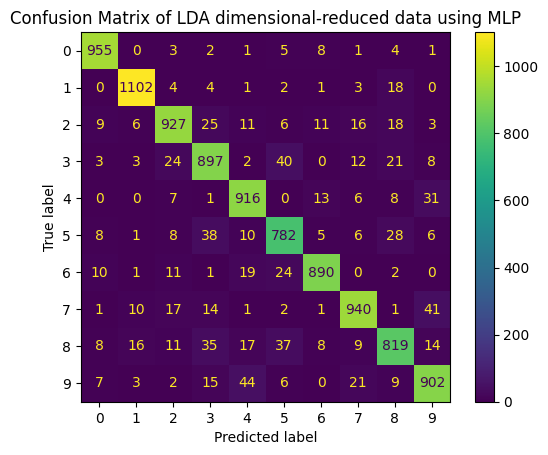

In [22]:
# Creating and training logistic regression model
model_MLP1 = MLPClassifier([32])
model_MLP2 = MLPClassifier([32])

pca_MLP = model_MLP1.fit(pca_train, train_targets)
lda_MLP = model_MLP2.fit(lda_train, train_targets)

# Predict probabilities
pca_predict_MLP = pca_MLP.predict(pca_test_train)
lda_predict_MLP= lda_MLP.predict(lda_test_train)

# Compute accuracy by confusion matrix
pca_matrix = confusion_matrix(test_targets,pca_predict_MLP)
lda_matrix = confusion_matrix(test_targets,lda_predict_MLP)

# Plot confusion matrix
pca_matrix = ConfusionMatrixDisplay(confusion_matrix=pca_matrix, display_labels=pca_MLP.classes_)
lda_matrix = ConfusionMatrixDisplay(confusion_matrix=lda_matrix, display_labels=lda_MLP.classes_)

pca_matrix.plot()
plt.title("Confusion Matrix of PCA dimensional-reduced data using MLP")
lda_matrix.plot()
plt.title("Confusion Matrix of LDA dimensional-reduced data using MLP")
plt.show()

## Comparing Accuracy

In [25]:
# Accuracy Bayesian PCA/LDA
print(f"PCA Bayesian Accuracy: {accuracy_pca:.2f}%")
print(f"LDA Bayesian Accuracy: {accuracy_lda:.2f}%\n")

# Accuracy LR PCA/LDA
print(f"PCA LR Accuracy: {pca_LR.score(pca_test_train,test_targets)*100:.2f}%")
print(f"LDA LR Accuracy: {lda_LR.score(lda_test_train,test_targets)*100:.2f}%\n")

# Accuracy MLP PCA/LDA
print(f"PCA MLP Accuracy: {pca_MLP.score(pca_test_train,test_targets)*100:.2f}%")
print(f"LDA MLP Accuracy: {lda_MLP.score(lda_test_train,test_targets)*100:.2f}%\n")



PCA Bayesian Accuracy: 84.61%
LDA Bayesian Accuracy: 89.54%

PCA LR Accuracy: 78.78%
LDA LR Accuracy: 88.57%

PCA MLP Accuracy: 88.99%
LDA MLP Accuracy: 91.30%

